In [1]:
#-*- coding:utf-8 -*-
# 랜덤 포레스트 분석
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# make_moons : 샘플 데이터 셋

x, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 42)

forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

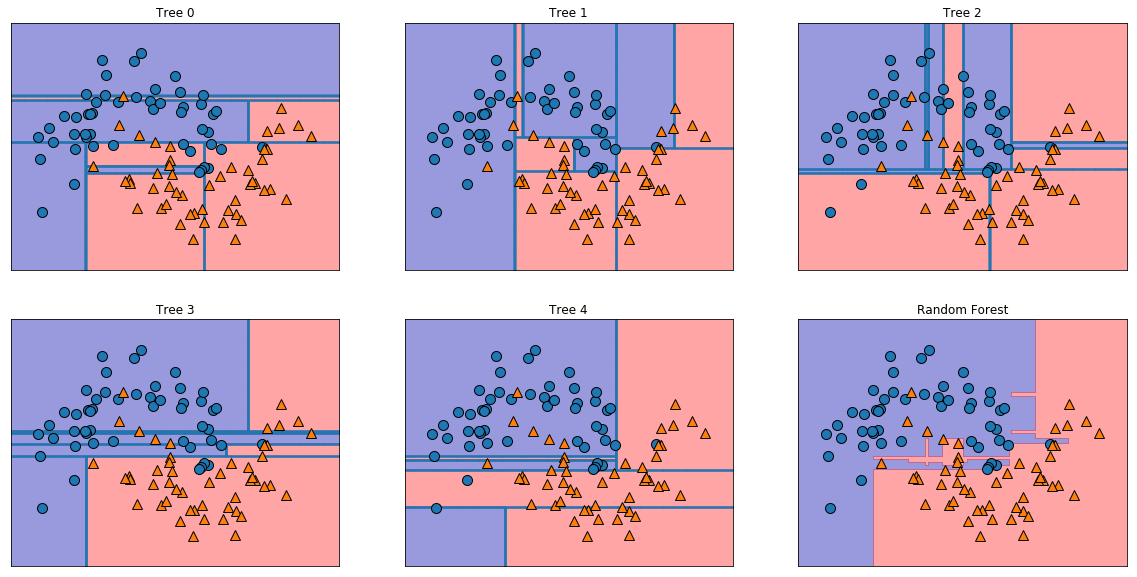

In [2]:
# 랜덤 포레스트 영역 출력
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x, y, tree, ax = ax)

mglearn.plots.plot_2d_separator(forest, x, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(x[:,0], x[:, 1], y)

In [3]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(x_test, y_test)))

훈련 세트 정확도 : 0.960
테스트 세트 정확도 : 0.920
